In [1]:
#suppressMessages(suppressWarnings(source("/home/mount/project/config_sing.R")))
suppressMessages(suppressWarnings(source("config_sing.R")))

* res_interactive_chr20.rds
* res_interactive_chr21.rds
* res_interactive_chrX.rds
* res_interactive_chrY.rds

In [2]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_interactive_chr17.rds"
fpath = file.path(fdiry, fname)
lst_res_chr17 = readRDS(fpath)

In [3]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_interactive_chr20.rds"
fpath = file.path(fdiry, fname)
lst_res_chr20 = readRDS(fpath)

In [4]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_interactive_chr21.rds"
fpath = file.path(fdiry, fname)
lst_res_chr21 = readRDS(fpath)

In [5]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_interactive_chrX.rds"
fpath = file.path(fdiry, fname)
lst_res_chrX = readRDS(fpath)

In [6]:
lst_dat = list(lst_res_chr17, lst_res_chr20, lst_res_chr21, lst_res_chrX)
lst_dat = lapply(lst_dat, function(lst_res){
    ###
    dat_motif_pair = names(lst_res)
    dat_motif_pair = sapply(dat_motif_pair, function(x){
        res = str_split(string = x, pattern = "\\|", simplify = TRUE)
        return(res)
    })
    dat_motif_pair = as.data.frame(t(dat_motif_pair))
    colnames(dat_motif_pair) = c("motif1", "motif2")
    
    ###
    lst = lapply(lst_res, function(res){
        tmp = coef(res)
        if (nrow(tmp) < 7){
            return(c(NA, NA, NA))
        } else {
            return(tmp[7, c(1, 3, 4)])
        }
    })
    dat_values = do.call(rbind, lst)
    
    ### 
    dat  = cbind(dat_motif_pair, dat_values) %>% as.data.frame
    idx1 = (dat$motif1 == "NR/20")
    idx2 = (dat$motif2 == "NR/20")
    idx  = idx1 + idx2
    dat$color = ifelse(idx > 0, "red", "grey50")
    
    dat = dat %>% mutate(AP1_1_NR_20 = (motif1 == "AP1/1" & motif2 == "NR/20"))
    
    ###
    dat$adj_pval = p.adjust(dat$`Pr(>|t|)`, method = "BH")
    return(dat)
})

In [7]:
head(lst_dat[[1]])

,motif1,motif2,Estimate,t value,Pr(>|t|),color,AP1_1_NR_20,adj_pval
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>
AIRE|AP1/1,AIRE,AP1/1,-1.965433e-04,-5.4070520,1.977743e-05,grey50,FALSE,0.0001867289
AIRE|AP1/2,AIRE,AP1/2,2.152351e-05,0.5474417,5.895865e-01,grey50,FALSE,0.6501180857
AIRE|BATF,AIRE,BATF,NA,NA,NA,grey50,FALSE,NA
AIRE|BCL6/1,AIRE,BCL6/1,NA,NA,NA,grey50,FALSE,NA
AIRE|BCL6/2,AIRE,BCL6/2,NA,NA,NA,grey50,FALSE,NA
AIRE|CCAAT/CEBP,AIRE,CCAAT/CEBP,NA,NA,NA,grey50,FALSE,NA


In [8]:
lapply(lst_dat, function(dat){dat %>% dplyr::filter(AP1_1_NR_20)})

,motif1,motif2,Estimate,t value,Pr(>|t|),color,AP1_1_NR_20,adj_pval
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>
AP1/1|NR/20,AP1/1,NR/20,-0.0007508834,-13.67193,3.123779e-12,red,TRUE,4.470626e-10
,motif1,motif2,Estimate,t value,Pr(>|t|),color,AP1_1_NR_20,adj_pval
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>
AP1/1|NR/20,AP1/1,NR/20,-0.0007047317,-16.17509,1.066921e-13,red,TRUE,1.602216e-11
,motif1,motif2,Estimate,t value,Pr(>|t|),color,AP1_1_NR_20,adj_pval
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>
AP1/1|NR/20,AP1/1,NR/20,-0.0002186742,-12.05551,3.638228e-11,red,TRUE,4.873359e-09
,motif1,motif2,Estimate,t value,Pr(>|t|),color,AP1_1_NR_20,adj_pval
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<dbl>


## Export table

In [14]:
lst = lst_dat
lst = lapply(lst, function(dat){
    dat = dat %>% 
        dplyr::select(motif1, motif2, Estimate, `t value`, `Pr(>|t|)`, adj_pval) %>%
        dplyr::rename(Raw_pvalue      = `Pr(>|t|)`) %>%
        dplyr::rename(Adjusted_pvalue = adj_pval) %>%
        na.omit
    return(dat)
})
head(lst[[1]])

,motif1,motif2,Estimate,t value,Raw_pvalue,Adjusted_pvalue
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AIRE|AP1/1,AIRE,AP1/1,-1.965433e-04,-5.4070520,1.977743e-05,1.867289e-04
AIRE|AP1/2,AIRE,AP1/2,2.152351e-05,0.5474417,5.895865e-01,6.501181e-01
AIRE|CREB/ATF/2,AIRE,CREB/ATF/2,-6.838623e-05,-6.4354913,2.230073e-06,3.603123e-05
AIRE|CTCF,AIRE,CTCF,-5.758231e-05,-0.6792550,5.040607e-01,5.718843e-01
AIRE|CUX/1,AIRE,CUX/1,8.453919e-06,1.7052297,1.063554e-01,1.630982e-01
AIRE|E2F/2,AIRE,E2F/2,-4.751297e-05,-0.6062263,5.505691e-01,6.145006e-01


In [15]:
FD_RES

[1] "/home/mount/work/out/proj_combeffect"

In [16]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_interactive_chr17.tsv"
fpath = file.path(fdiry, fname)

dat = lst[[1]]
write_tsv(dat, fpath)

In [17]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_interactive_chr20.tsv"
fpath = file.path(fdiry, fname)

dat = lst[[2]]
write_tsv(dat, fpath)

In [18]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_interactive_chr21.tsv"
fpath = file.path(fdiry, fname)

dat = lst[[3]]
write_tsv(dat, fpath)

In [19]:
fdiry = file.path(FD_RES, "model_linear")
fname = "res_interactive_chrX.tsv"
fpath = file.path(fdiry, fname)

dat = lst[[4]]
write_tsv(dat, fpath)

## Visualization

In [9]:
lst_gpt = lapply(lst_dat, function(dat){
    dat = dat %>% na.omit
    gpt = ggplot(dat, aes(x=Estimate, y=-log10(adj_pval))) + 
        geom_point(size=1, color=dat$color) + 
        geom_hline(yintercept = 2, color="red", alpha=0.5) +
        labs(x="Estimate", y="-log10(adj. p-value (BH))") +
        theme_bw() +
        theme(
            axis.text.x        = element_text(size=10),
            axis.text.y        = element_text(size=10),
            axis.text.y.right  = element_text(size=10),
            axis.title.x       = element_text(size=12),
            axis.title.y       = element_text(size=12),
            axis.title.y.right = element_text(size=12)
        )
    return(gpt)
})
lst_gpt[[1]] = lst_gpt[[1]] + ggtitle("Chr17")
lst_gpt[[2]] = lst_gpt[[2]] + ggtitle("Chr20")
lst_gpt[[3]] = lst_gpt[[3]] + ggtitle("Chr21")
lst_gpt[[4]] = lst_gpt[[4]] + ggtitle("ChrX")

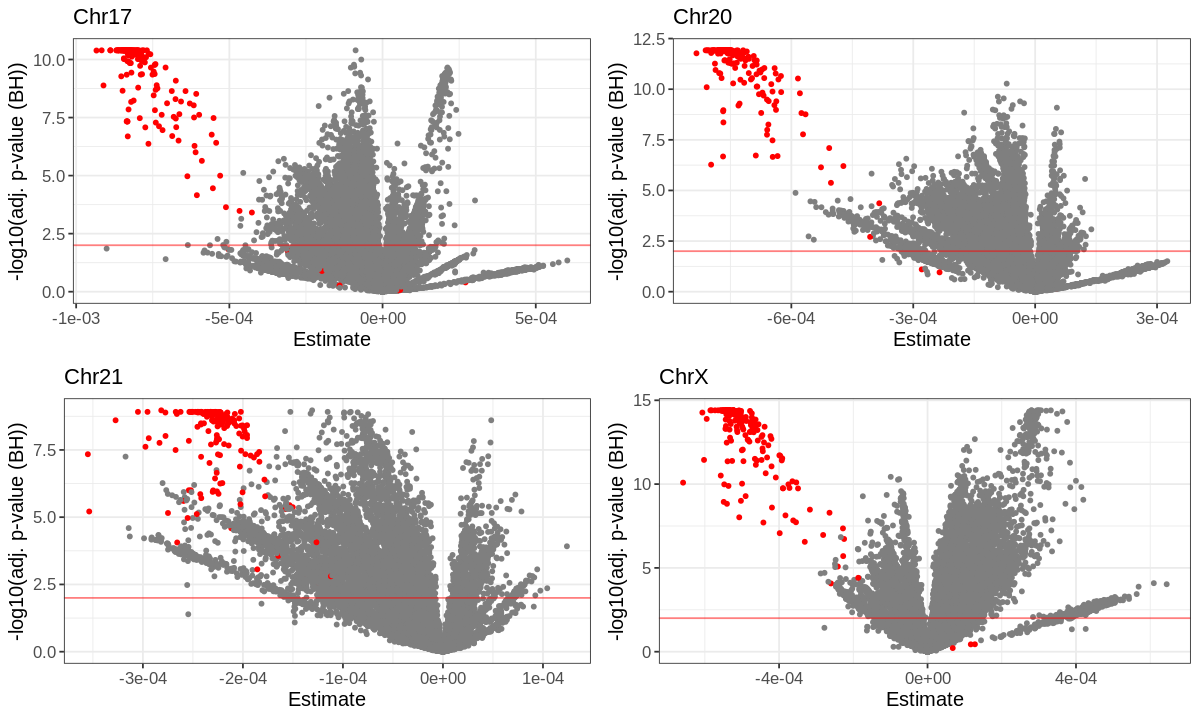

In [10]:
options(repr.plot.height=6, repr.plot.width=10)
grid.arrange(grobs = lst_gpt, ncol = 2)

In [11]:
cols <- c("TRUE" = "red", "FALSE" = "grey50")

lst_gpt = lapply(lst_dat, function(dat){
    dat = dat %>% na.omit
    tmp = dat %>% dplyr::filter(AP1_1_NR_20)
    gpt = ggplot(dat, aes(x=Estimate, y=-log10(adj_pval))) + 
        geom_point(size=1, color="grey50") + 
        geom_point(size=1, color="red", 
                   data = tmp, 
                   aes(x=Estimate, y=-log10(adj_pval))) + 
        geom_hline(yintercept = 2, color="red", alpha=0.5) +
        labs(x="Estimate", y="-log10(adj. p-value (BH))") +
        theme_bw() +
        theme(
            axis.text.x        = element_text(size=10),
            axis.text.y        = element_text(size=10),
            axis.text.y.right  = element_text(size=10),
            axis.title.x       = element_text(size=12),
            axis.title.y       = element_text(size=12),
            axis.title.y.right = element_text(size=12)
        ) #+
        #scale_colour_manual(values = cols)
    return(gpt)
})
lst_gpt[[1]] = lst_gpt[[1]] + ggtitle("Chr17")
lst_gpt[[2]] = lst_gpt[[2]] + ggtitle("Chr20")
lst_gpt[[3]] = lst_gpt[[3]] + ggtitle("Chr21")
lst_gpt[[4]] = lst_gpt[[4]] + ggtitle("ChrX")

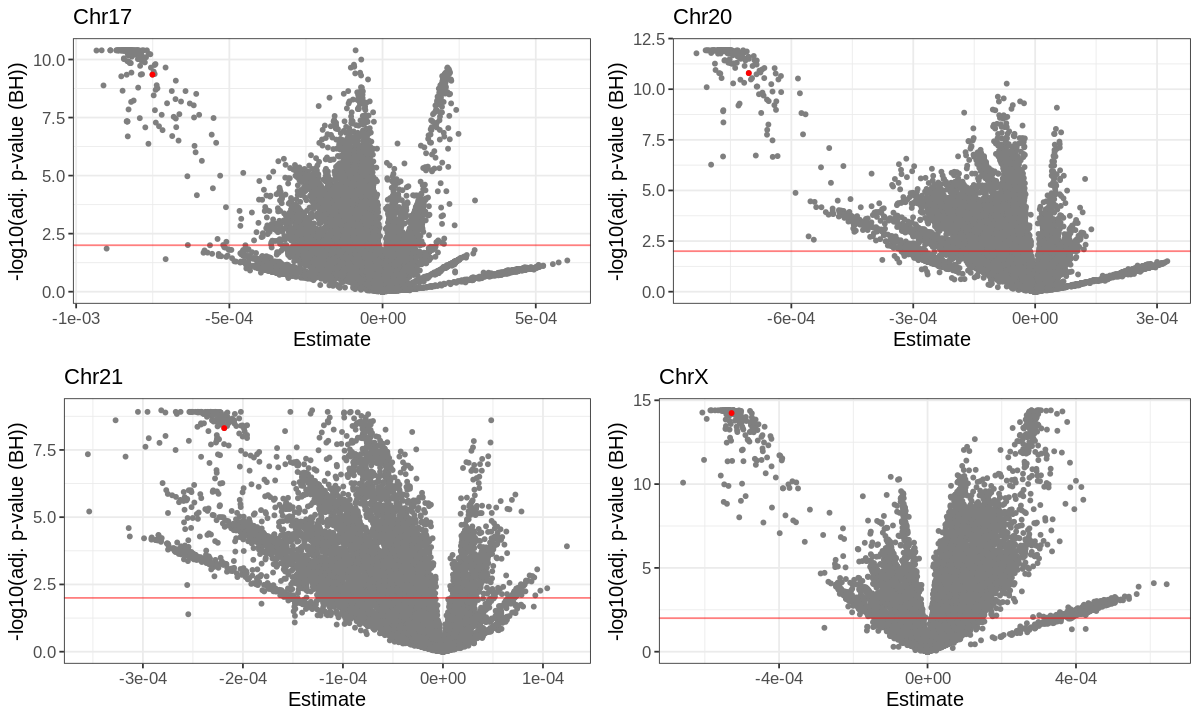

In [12]:
options(repr.plot.height=6, repr.plot.width=10)
grid.arrange(grobs = lst_gpt, ncol = 2)

In [93]:
lst_res = lst_res_chr21

dat_motif_pair = names(lst_res)
dat_motif_pair = sapply(dat_motif_pair, function(x){
    res = str_split(string = x, pattern = "\\|", simplify = TRUE)
    return(res)
})

dat_motif_pair = as.data.frame(t(dat_motif_pair))
colnames(dat_motif_pair) = c("motif1", "motif2")
head(dat_motif_pair)

###
lst = lapply(lst_res, function(res){
    tmp = coef(res)
    if (nrow(tmp) < 7){
        return(c(NA, NA, NA))
    } else {
        return(tmp[7, c(1, 3, 4)])
    }
})

dat_values = do.call(rbind, lst)
head(dat_values)

,motif1,motif2
,<chr>,<chr>
AIRE|AP1/1,AIRE,AP1/1
AIRE|AP1/2,AIRE,AP1/2
AIRE|BATF,AIRE,BATF
AIRE|BCL6/1,AIRE,BCL6/1
AIRE|BCL6/2,AIRE,BCL6/2
AIRE|CCAAT/CEBP,AIRE,CCAAT/CEBP


,Estimate,t value,Pr(>|t|)
AIRE|AP1/1,-8.095292e-05,-3.959549,0.001012165
AIRE|AP1/2,NA,NA,NA
AIRE|BATF,NA,NA,NA
AIRE|BCL6/1,NA,NA,NA
AIRE|BCL6/2,NA,NA,NA
AIRE|CCAAT/CEBP,NA,NA,NA


In [94]:
dat = cbind(dat_motif_pair, dat_values)
dat = dat %>% na.omit
idx1 = (dat$motif1 == "NR/20")
idx2 = (dat$motif2 == "NR/20")
idx  = idx1 + idx2
dat$color = ifelse(idx > 0, "red", "grey50")
head(dat)

,motif1,motif2,Estimate,t value,Pr(>|t|),color
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
AIRE|AP1/1,AIRE,AP1/1,-8.095292e-05,-3.959549,1.012165e-03,grey50
AIRE|CREB/ATF/2,AIRE,CREB/ATF/2,5.972469e-06,1.115686,2.765952e-01,grey50
AIRE|Ebox/CACGTG/1,AIRE,Ebox/CACGTG/1,-1.213948e-04,-5.474751,1.971469e-05,grey50
AIRE|Ebox/CACGTG/2,AIRE,Ebox/CACGTG/2,-5.172208e-05,-2.165863,4.324945e-02,grey50
AIRE|Ebox/CAGCTG,AIRE,Ebox/CAGCTG,-1.481829e-04,-2.133994,4.770570e-02,grey50
AIRE|ETS/2,AIRE,ETS/2,-9.762050e-05,-2.992525,6.709809e-03,grey50


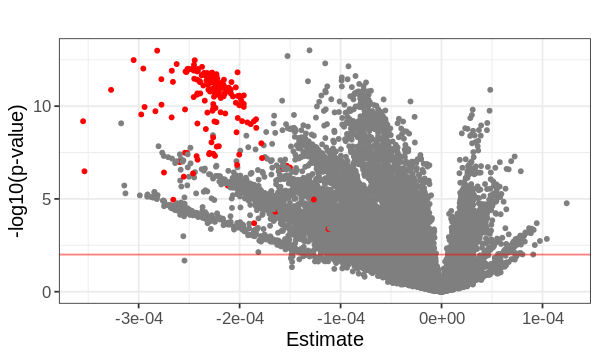

In [95]:
gpt = ggplot(dat, aes(x=Estimate, y=-log10(`Pr(>|t|)`))) + 
    geom_point(size=1, color=dat$color) + 
    geom_hline(yintercept = 2, color="red", alpha=0.5) +
    labs(title="", x="Estimate", y="-log10(p-value)") +
    theme_bw() +
    theme(
        axis.text.x        = element_text(size=10),
        axis.text.y        = element_text(size=10),
        axis.text.y.right  = element_text(size=10),
        axis.title.x       = element_text(size=12),
        axis.title.y       = element_text(size=12),
        axis.title.y.right = element_text(size=12)
    )

options(repr.plot.height=3, repr.plot.width=5)
print(gpt)

In [103]:
lst_res = lst_res_chr21

b_est = lapply(lst_res, function(res){
    tmp = coef(res)
    if (nrow(tmp) < 7){
        return(NA)
    } else {
        return(tmp[7, 1])
    }
})
head(b_est)

$`AIRE|AP1/1`
[1] -8.095292e-05

$`AIRE|AP1/2`
[1] NA

$`AIRE|BATF`
[1] NA

$`AIRE|BCL6/1`
[1] NA

$`AIRE|BCL6/2`
[1] NA

$`AIRE|CCAAT/CEBP`
[1] NA

In [106]:
lst_res = lst_res_chr21

b_est = lapply(lst_res, function(res){
    tmp = coef(res)
    if (nrow(tmp) < 7){
        return(c(NA, NA, NA))
    } else {
        return(tmp[7, c(1, 3, 4)])
    }
})

head(do.call(rbind, b_est))

,Estimate,t value,Pr(>|t|)
AIRE|AP1/1,-8.095292e-05,-3.959549,0.001012165
AIRE|AP1/2,NA,NA,NA
AIRE|BATF,NA,NA,NA
AIRE|BCL6/1,NA,NA,NA
AIRE|BCL6/2,NA,NA,NA
AIRE|CCAAT/CEBP,NA,NA,NA


In [110]:
lst_res = lst_res_chr21

b_est = lapply(lst_res, function(res){
    tmp = coef(res)
    if (nrow(tmp) < 7){
        return(NA)
    } else {
        return(tmp[7, 1])
    }
})
head(b_est)

$`AIRE|AP1/1`
[1] -8.095292e-05

$`AIRE|AP1/2`
[1] NA

$`AIRE|BATF`
[1] NA

$`AIRE|BCL6/1`
[1] NA

$`AIRE|BCL6/2`
[1] NA

$`AIRE|CCAAT/CEBP`
[1] NA

In [116]:
lst_res = lst_res_chr21

b_est = lapply(lst_res, function(res){
    tmp = coef(res)
    if (nrow(tmp) < 7){
        return(NA)
    } else {
        return(tmp[7, 1])
    }
})

t_val = lapply(lst_res, function(res){
    tmp = coef(res)
    if (nrow(tmp) < 7){
        return(NA)
    } else {
        return(tmp[7, 3])
    }
})

p_val = lapply(lst_res, function(res){
    tmp = coef(res)
    if (nrow(tmp) < 7){
        return(NA)
    } else {
        return(tmp[7, 4])
    }
})
tmp = dat_motif_pair
tmp$b_est = unlist(b_est)
tmp$t_val = unlist(t_val)
tmp$p_val = unlist(p_val)
tmp$nlogpval = -log10(tmp$p_val)
head(tmp)

,motif1,motif2,b_est,t_val,p_val,nlogpval
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
AIRE|AP1/1,AIRE,AP1/1,-8.095292e-05,-3.959549,0.001012165,2.994749
AIRE|AP1/2,AIRE,AP1/2,NA,NA,NA,NA
AIRE|BATF,AIRE,BATF,NA,NA,NA,NA
AIRE|BCL6/1,AIRE,BCL6/1,NA,NA,NA,NA
AIRE|BCL6/2,AIRE,BCL6/2,NA,NA,NA,NA
AIRE|CCAAT/CEBP,AIRE,CCAAT/CEBP,NA,NA,NA,NA


In [117]:
head(unlist(b_est))

AIRE|AP1/1      AIRE|AP1/2       AIRE|BATF     AIRE|BCL6/1     AIRE|BCL6/2 
  -8.095292e-05              NA              NA              NA              NA 
AIRE|CCAAT/CEBP 
             NA

In [118]:
tmp = tmp %>% na.omit
idx1 = (tmp$motif1 == "NR/20")
idx2 = (tmp$motif2 == "NR/20")
idx  = idx1 + idx2
tmp$color = ifelse(idx > 0, "red", "grey50")
head(tmp)

,motif1,motif2,b_est,t_val,p_val,nlogpval,color
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
AIRE|AP1/1,AIRE,AP1/1,-8.095292e-05,-3.959549,1.012165e-03,2.9947487,grey50
AIRE|CREB/ATF/2,AIRE,CREB/ATF/2,5.972469e-06,1.115686,2.765952e-01,0.5581554,grey50
AIRE|Ebox/CACGTG/1,AIRE,Ebox/CACGTG/1,-1.213948e-04,-5.474751,1.971469e-05,4.7052100,grey50
AIRE|Ebox/CACGTG/2,AIRE,Ebox/CACGTG/2,-5.172208e-05,-2.165863,4.324945e-02,1.3640194,grey50
AIRE|Ebox/CAGCTG,AIRE,Ebox/CAGCTG,-1.481829e-04,-2.133994,4.770570e-02,1.3214297,grey50
AIRE|ETS/2,AIRE,ETS/2,-9.762050e-05,-2.992525,6.709809e-03,2.1732898,grey50


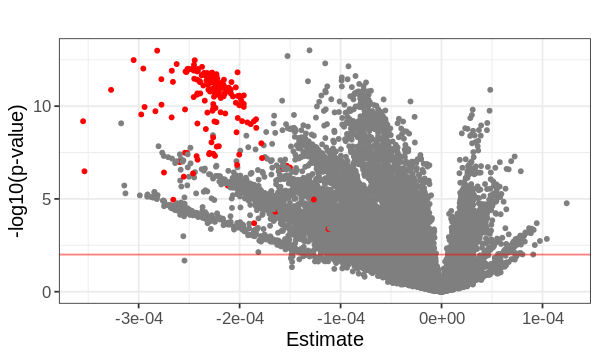

In [119]:
gpt = ggplot(tmp, aes(x=b_est, y=nlogpval)) + 
    geom_point(size=1, color=dat$color) + 
    geom_hline(yintercept = 2, color="red", alpha=0.5) +
    labs(title="", x="Estimate", y="-log10(p-value)") +
    theme_bw() +
    theme(
        axis.text.x        = element_text(size=10),
        axis.text.y        = element_text(size=10),
        axis.text.y.right  = element_text(size=10),
        axis.title.x       = element_text(size=12),
        axis.title.y       = element_text(size=12),
        axis.title.y.right = element_text(size=12)
    )

options(repr.plot.height=3, repr.plot.width=5)
print(gpt)

In [192]:
lst_res = lst_res_chrX

In [193]:
pval = lapply(lst_res, function(res){
    res = coef(res)
    if (nrow(res) < 7){
        return(NA)
    } else {
        return(res[7, 4])
    }
})

In [194]:
dat_motif_pair = names(lst_res)
dat_motif_pair = sapply(dat_motif_pair, function(x){
    res = str_split(string = x, pattern = "\\|", simplify = TRUE)
    return(res)
})
dat_motif_pair = as.data.frame(t(dat_motif_pair))
colnames(dat_motif_pair) = c("motif1", "motif2")
head(dat_motif_pair)

,motif1,motif2
,<chr>,<chr>
AIRE|AP1/1,AIRE,AP1/1
AIRE|AP1/2,AIRE,AP1/2
AIRE|BATF,AIRE,BATF
AIRE|BCL6/1,AIRE,BCL6/1
AIRE|BCL6/2,AIRE,BCL6/2
AIRE|CCAAT/CEBP,AIRE,CCAAT/CEBP


In [195]:
tmp = dat_motif_pair
tmp$pval = unlist(pval)
tmp$nlogpval = -log10(tmp$pval)
head(tmp)

,motif1,motif2,pval,nlogpval
,<chr>,<chr>,<dbl>,<dbl>
AIRE|AP1/1,AIRE,AP1/1,0.7791034139,0.1084049
AIRE|AP1/2,AIRE,AP1/2,0.0001132584,3.9459297
AIRE|BATF,AIRE,BATF,NA,NA
AIRE|BCL6/1,AIRE,BCL6/1,NA,NA
AIRE|BCL6/2,AIRE,BCL6/2,NA,NA
AIRE|CCAAT/CEBP,AIRE,CCAAT/CEBP,NA,NA


In [196]:
mat = tmp %>% dplyr::select(motif1, motif2, nlogpval) %>% spread(motif2, nlogpval)
mat = column_to_rownames(mat, var = "motif1")

idx = colnames(mat)
mat = mat[idx,]
mat[is.na(mat)] = 0
mat = mat + t(mat)
mat_ori = mat
head(mat_ori)

,AP1/1,AP1/2,BATF,BCL6/1,BCL6/2,CCAAT/CEBP,CENBP,CREB/ATF/1,CREB/ATF/2,CREB/ATF/3,⋯,ZNF586,ZNF667,ZNF680,ZNF708,ZNF713,ZNF768,ZNF784,ZNF85,ZSCAN3,ZSCAN4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AP1/1,0.0000000,0.9100266,0.546800,0.1224335,0.13705411,0.51592670,0.4383176,0.8300342,0.09922493,0.1433191,⋯,1.449873,2.1795350,0.2085828,0.560274713,0.17456132,1.3218756,0.06698865,0.1673481,4.200752,0.21280021
AP1/2,0.9100266,0.0000000,5.196279,4.6925758,4.47954612,4.94946631,0.0000000,5.8165308,4.76611589,5.1604216,⋯,5.787834,5.9568771,4.6891470,4.843652736,5.02706476,1.1634411,4.96400987,2.8724365,1.130869,4.74637782
BATF,0.5468000,5.1962789,0.000000,0.0000000,1.38579925,6.59696133,0.0000000,4.6473418,2.64775226,4.3371348,⋯,3.828026,3.4943791,2.3319751,0.641577901,0.00000000,0.3852037,2.41352376,0.5420364,3.321562,2.46103675
BCL6/1,0.1224335,4.6925758,0.000000,0.0000000,0.13966470,0.00000000,0.0000000,0.0000000,0.19323195,0.0000000,⋯,1.303759,0.0000000,0.0000000,0.000000000,0.00000000,0.3276386,0.00000000,0.2153036,3.561544,0.00000000
BCL6/2,0.1370541,4.4795461,1.385799,0.1396647,0.00000000,0.00098772,0.0000000,1.1817268,0.07234234,0.5206154,⋯,1.702142,0.6980194,0.3770452,0.005721717,0.04358355,0.4799208,0.02369518,0.2996358,3.506940,0.05742699
CCAAT/CEBP,0.5159267,4.9494663,6.596961,0.0000000,0.00098772,0.00000000,0.0000000,3.1869265,0.01216705,1.0897272,⋯,0.000000,1.0596777,0.1179855,0.112441140,0.00000000,0.4133536,0.00000000,0.1704847,4.463425,0.42056206


In [197]:
idx = apply(mat_ori, 1, mean)
idx = (idx > 3)
mat_fil = mat_ori[idx, idx]
print(dim(mat_fil))
print(which(colnames(mat_fil) == "NR/20"))
print(which(colnames(mat_fil) == "AP1/1"))
head(mat_fil)

[1] 48 48
[1] 15
integer(0)


,AP1/2,BATF,CREB/ATF/1,CTCF,E2F/2,Ebox/CACGTG/1,ETS/1,ETS/2,EVI1/MECOM,FOX/7,⋯,ZNF257,ZNF317,ZNF324,ZNF329,ZNF335,ZNF418,ZNF449,ZNF554,ZNF563,ZSCAN3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AP1/2,0.000000,5.196279,5.816531,8.582682,7.809877,6.369979,6.105466,6.869650,5.571172,0.6530443,⋯,5.748342,6.091506,5.397592,8.377089,9.063754,9.102367,5.916890,2.903545,6.689651,1.1308694
BATF,5.196279,0.000000,4.647342,6.401350,6.457506,8.327119,6.692202,5.935180,7.447802,5.5054365,⋯,6.803804,4.743664,4.245960,10.244650,9.841182,11.322129,6.685060,7.579785,5.666045,3.3215620
CREB/ATF/1,5.816531,4.647342,0.000000,5.458369,6.007903,8.136002,5.785663,6.431951,6.661307,6.1972717,⋯,6.525165,4.467463,3.909414,7.532653,9.267669,10.758717,5.802270,8.725152,5.095505,3.3910160
CTCF,8.582682,6.401350,5.458369,0.000000,3.586131,7.935274,5.636182,7.051345,6.595887,0.4860822,⋯,4.717707,7.234029,5.710166,5.818164,6.110182,9.441860,6.245545,6.824067,4.390215,0.8059353
E2F/2,7.809877,6.457506,6.007903,3.586131,0.000000,7.721527,5.008665,7.514221,6.117458,0.9665501,⋯,5.236588,6.926788,7.018587,4.879912,5.109325,8.179712,6.577969,8.477967,5.106476,1.5290645
Ebox/CACGTG/1,6.369979,8.327119,8.136002,7.935274,7.721527,0.000000,6.321482,5.647114,8.098784,1.0031771,⋯,6.887673,6.987714,6.437114,10.308211,9.666006,11.876211,9.121864,9.887539,7.096154,0.5424971


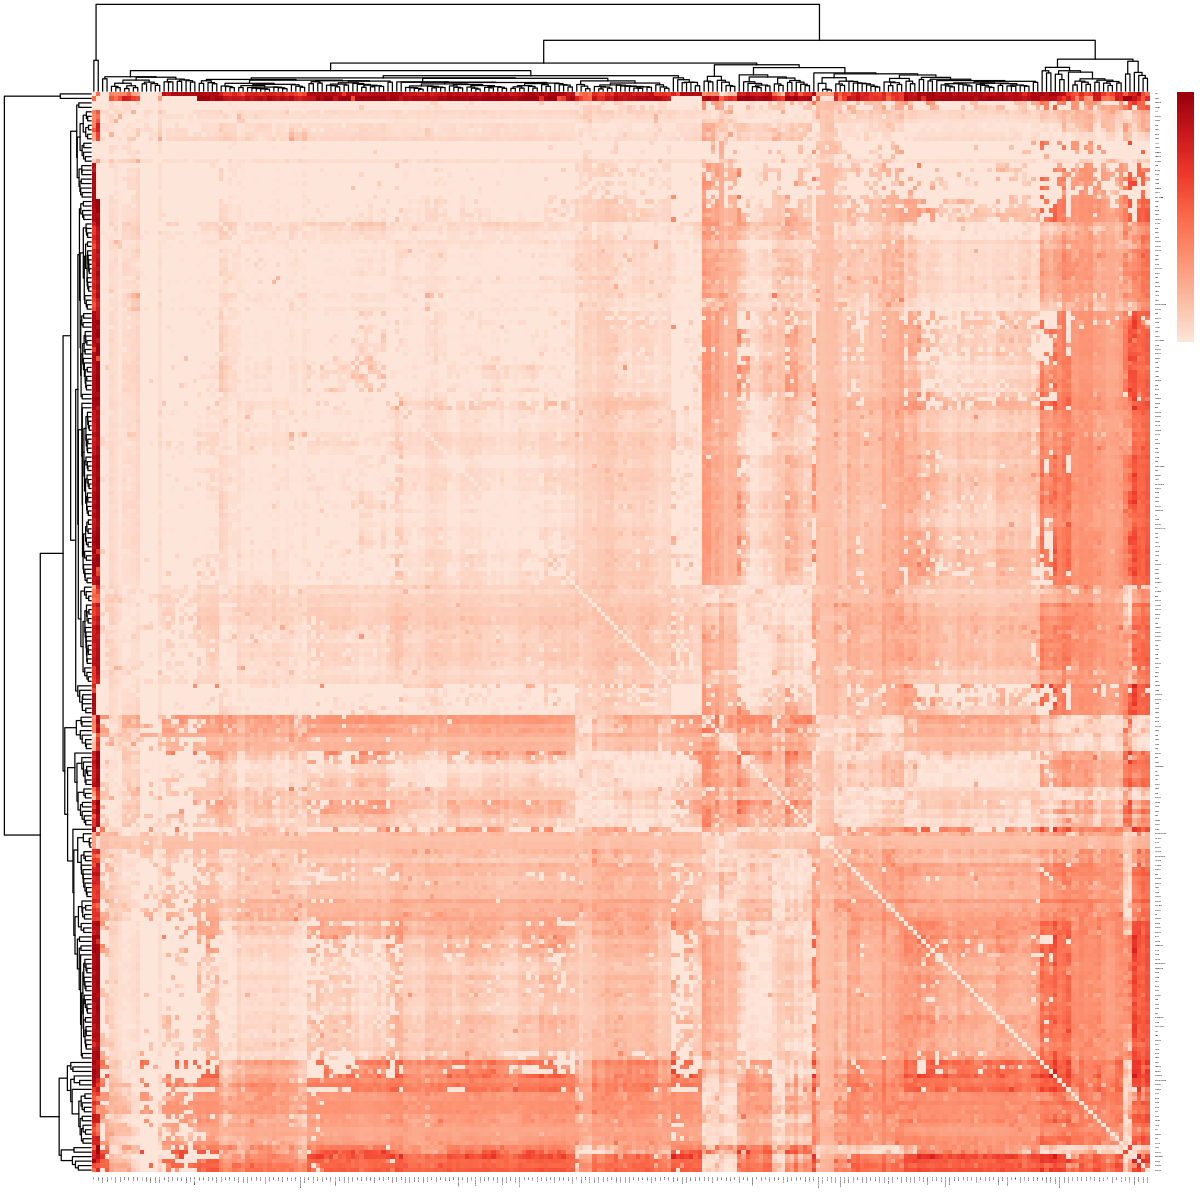

In [198]:
options(repr.plot.width=10, repr.plot.height=10)
out = pheatmap(
    mat_ori, 
    fontsize = 1,
    color = colorRampPalette(brewer.pal(n = 7, name="Reds"))(100))

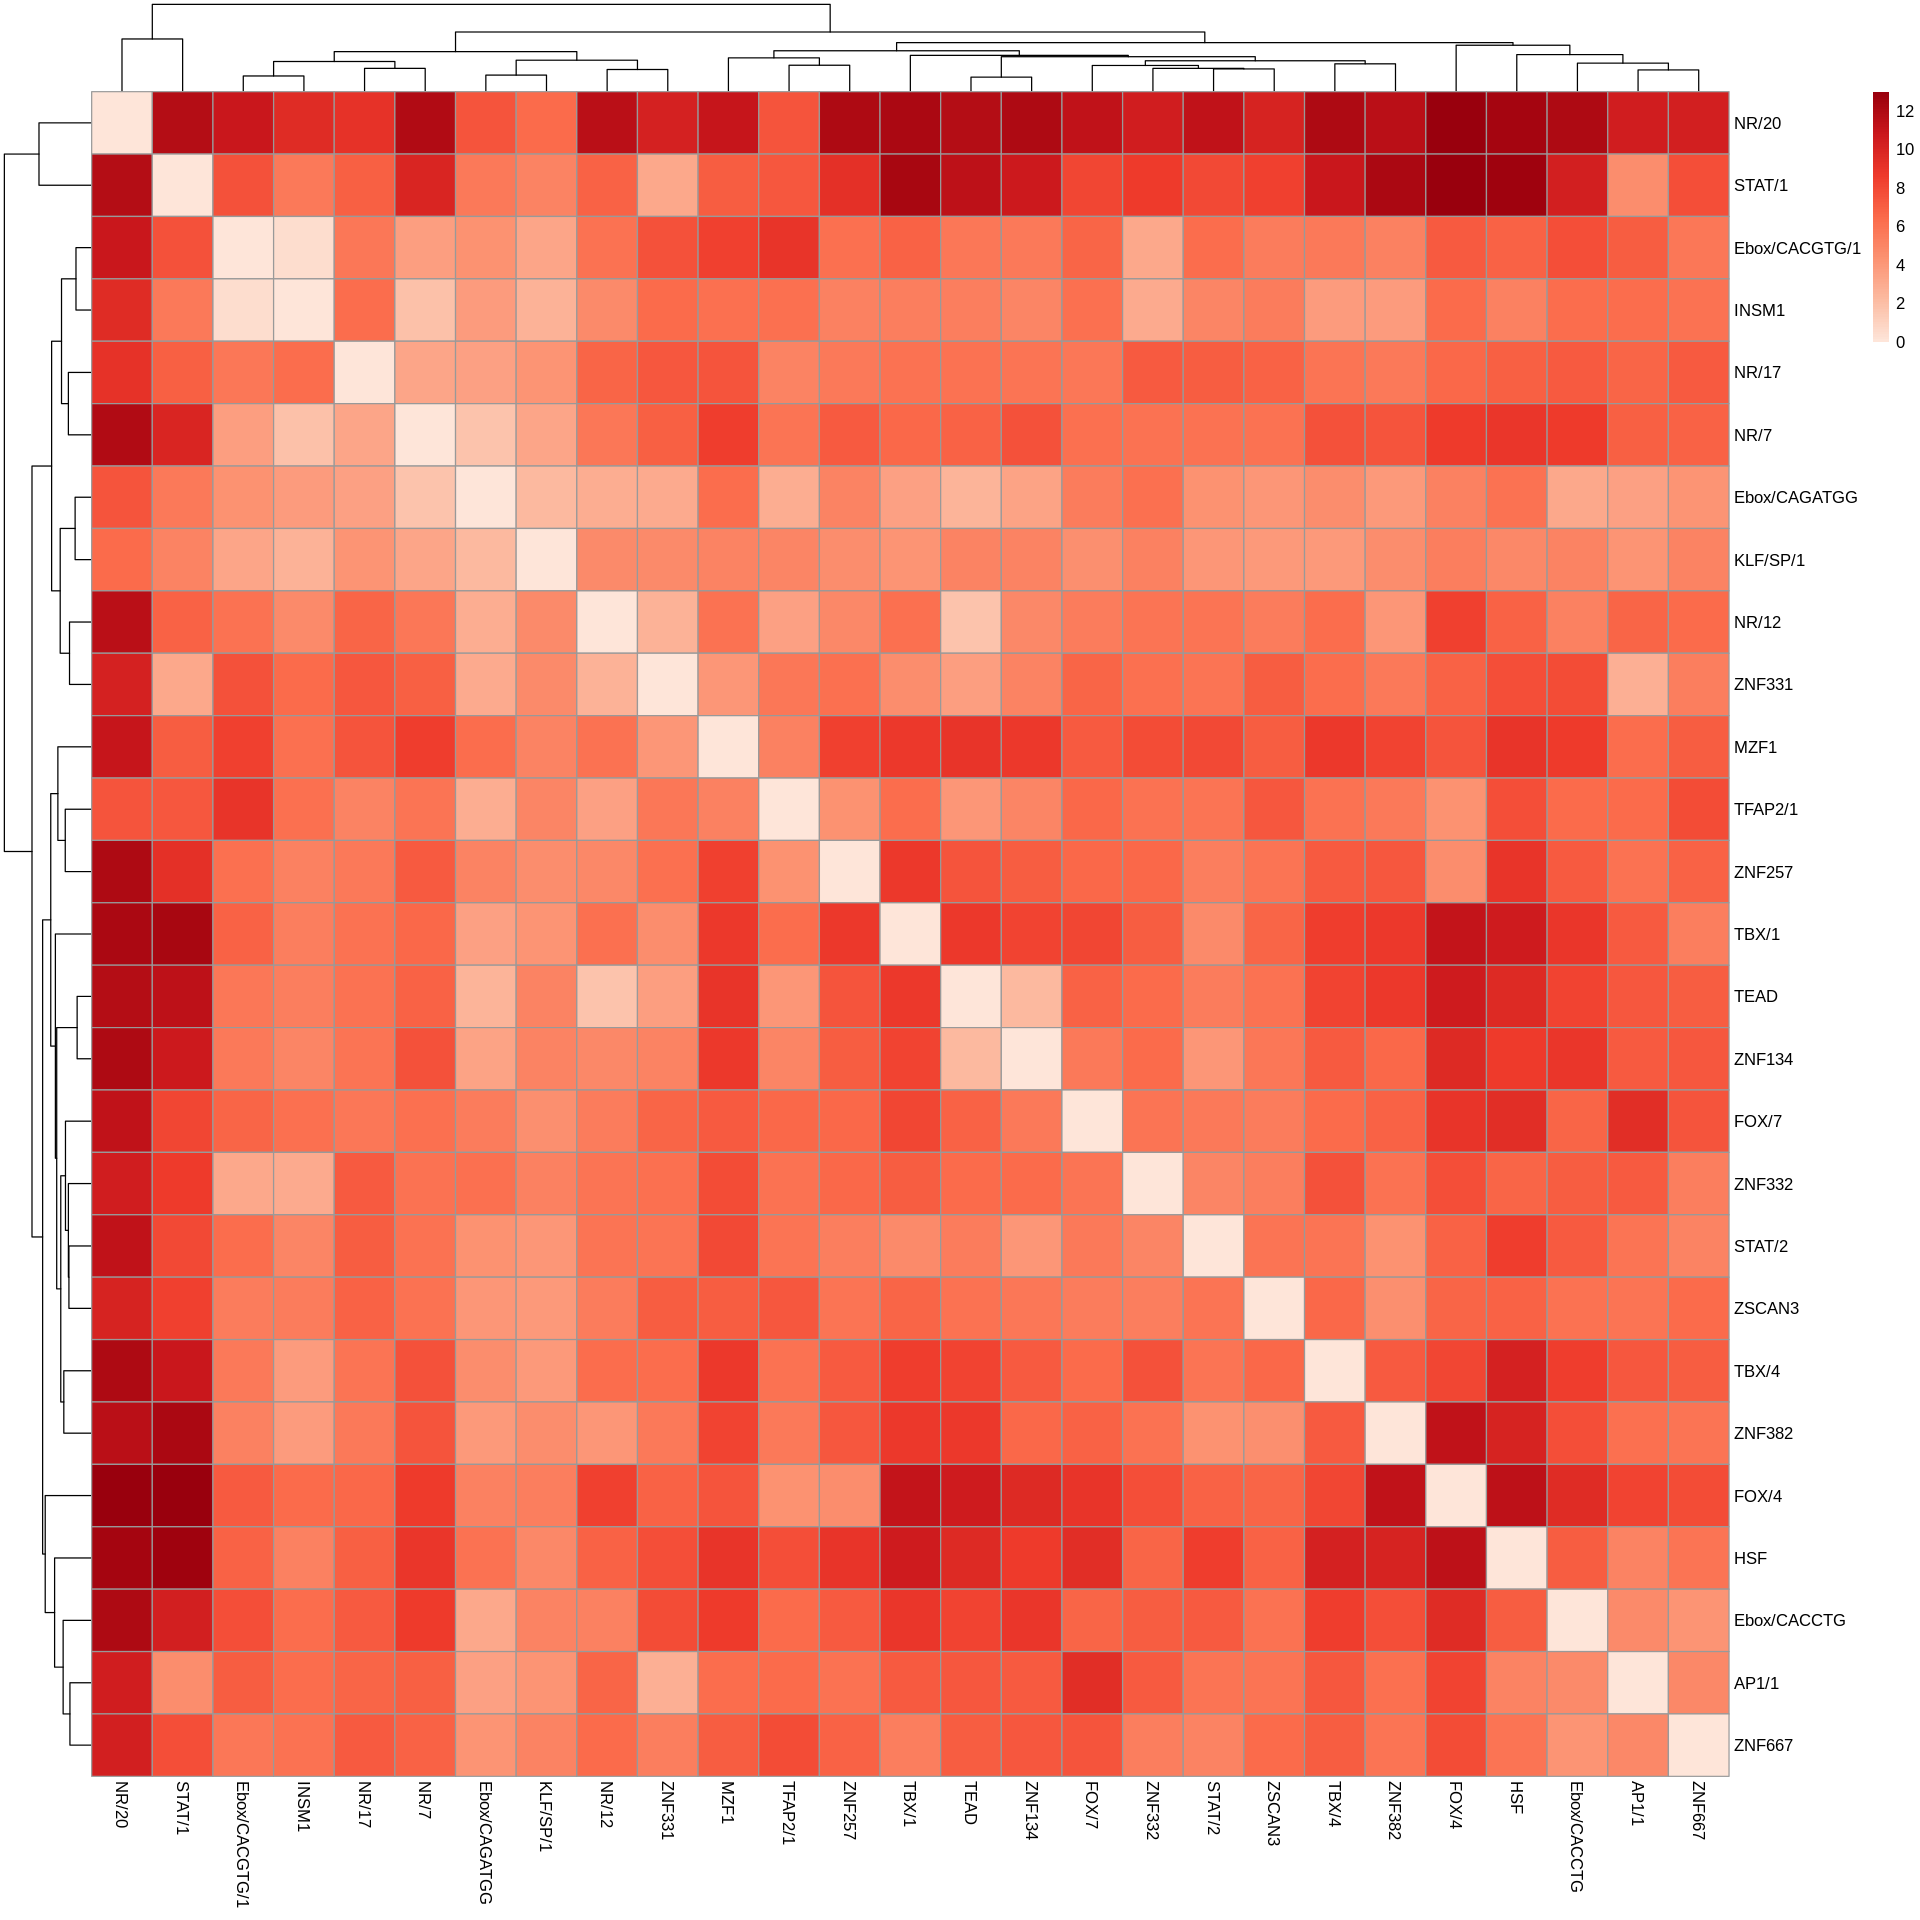

In [11]:
options(repr.plot.width=16, repr.plot.height=16)
out = pheatmap(
    mat_fil, 
    fontsize = 10,
    color = colorRampPalette(brewer.pal(n = 7, name="Reds"))(100))

In [13]:
tmp = mat_fil[out$tree_row[["order"]], "NR/20", drop=FALSE]
tmp 

,NR/20
,<dbl>
NR/20,0.000000
STAT/1,11.823499
Ebox/CACGTG/1,10.877360
INSM1,9.551983
NR/17,9.186386
NR/7,11.909997
Ebox/CAGATGG,7.486377
KLF/SP/1,6.489889
NR/12,11.451857
